In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

DATA CLEANING


In [2]:
df=pd.read_csv('Salary_Data.csv')
print(df.head())
print(f"Number of rows : {len(df)}")

   YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891
Number of rows : 30


In [3]:
# Convert columns to numeric types, coercing errors to NaN
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['YearsExperience'] = pd.to_numeric(df['YearsExperience'], errors='coerce')
df['Age'] = df['Age'].astype(int)
df.head(5)

,YearsExperience,Age,Salary
0,1.1,21,39343
1,1.3,21,46205
2,1.5,21,37731
3,2.0,22,43525
4,2.2,22,39891


In [4]:
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.100000,76003.000000
std,2.837888,5.267663,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.000000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     int64  
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 852.0 bytes


In [6]:
correlation=df.corr()['Salary']
print(correlation)


correlation=df['Salary'].corr(df['YearsExperience'])

print(f"Correlation between YearsExperience and Salary: {correlation:.2f}")

YearsExperience    0.978242
Age                0.974341
Salary             1.000000
Name: Salary, dtype: float64
Correlation between YearsExperience and Salary: 0.98


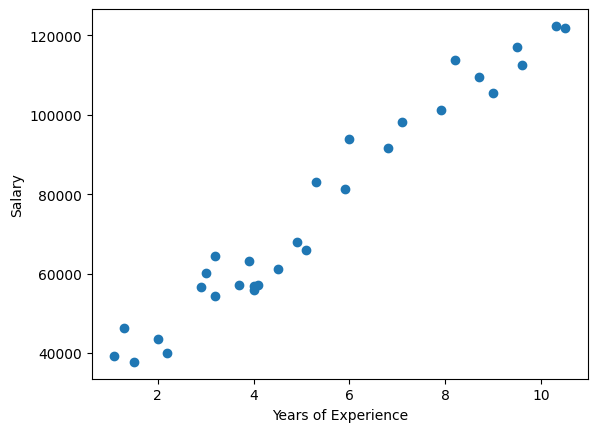

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

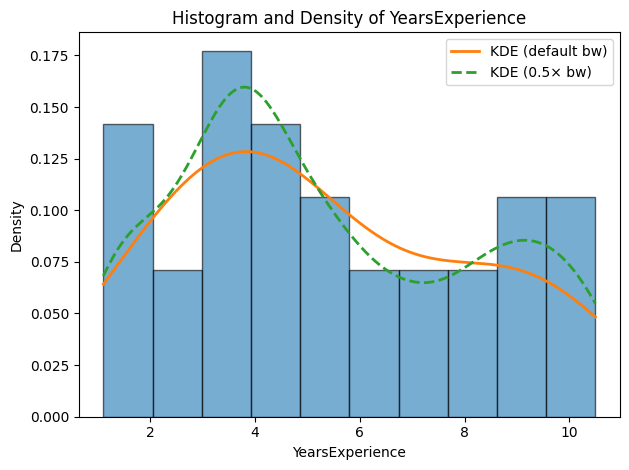

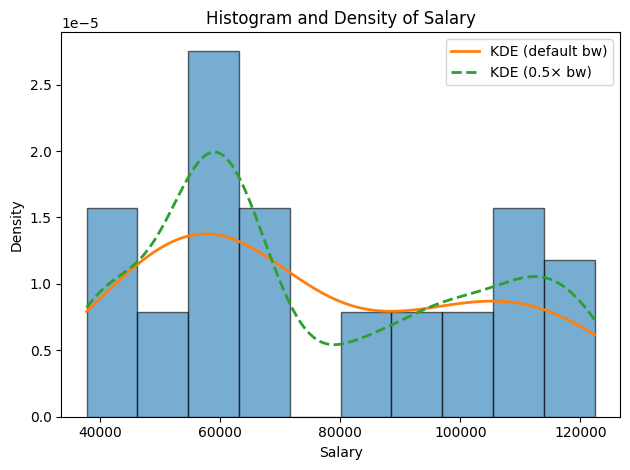

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

continuous_vars = ['YearsExperience', 'Salary']  
for var in continuous_vars:
    data = df[var].dropna()

    # Plot histogram (density-scaled)
    plt.figure()
    plt.hist(data, bins=10, density=True, alpha=0.6, edgecolor='black')

    # Prepare x-axis values for KDE
    x_vals = np.linspace(data.min(), data.max(), 200)

    # Default-bandwidth KDE
    kde_default = gaussian_kde(data)
    plt.plot(x_vals, kde_default(x_vals), label='KDE (default bw)', lw=2)

    # Half-bandwidth KDE for a second perspective
    kde_half = gaussian_kde(data, bw_method=kde_default.factor * 0.5)
    plt.plot(x_vals, kde_half(x_vals), label='KDE (0.5× bw)', linestyle='--', lw=2)

    # Formatting
    plt.title(f'Histogram and Density of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

LINEAR REGRESSION MODEL

In [9]:
X = df[['YearsExperience']]
y = df['Salary']
sk_model = LinearRegression()
sk_model.fit(X, y)
y_pred = sk_model.predict(X)
# Extract coefficients and metrics
intercept = sk_model.intercept_
slope = sk_model.coef_[0]
r_squared = r2_score(y, y_pred)
print("\n" + "="*50)
print("REGRESSION RESULTS")
print("="*50)
print(f"Regression Equation: Salary = {intercept:.2f} + {slope:.2f} * YearsExperience")
print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R²: {r_squared:.4f}")



REGRESSION RESULTS
Regression Equation: Salary = 25792.20 + 9449.96 * YearsExperience
Intercept: 25792.20
Slope: 9449.96
R²: 0.9570


Residual calculation
Residuals = actual - predicted

In [10]:
y_actual = y
residuals = y_actual - y_pred

print("\n" + "="*30)
print("RESIDUALS SUMMARY (Entire Dataset)")
print("="*30)
print(f"Mean of residuals: {residuals.mean():.6f}")
print(f"Std dev of residuals: {residuals.std():.2f}")
print(f"Min residual: {residuals.min():.2f}")
print(f"Max residual: {residuals.max():.2f}")
print(f"Sum of residuals: {residuals.sum():.6f}")  # ≈0




RESIDUALS SUMMARY (Entire Dataset)
Mean of residuals: -0.000000
Std dev of residuals: 5687.64
Min residual: -7958.01
Max residual: 11448.03
Sum of residuals: -0.000000


RSS and RMSE

In [11]:

rss = (residuals ** 2).sum()
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("\n" + "="*50)
print("RESIDUAL SUM OF SQUARES (RSS) & RMSE - ENTIRE DATASET")
print("="*50)
print(f"Total RSS = {rss:.2f}")
print(f"RMSE = {rmse:.2f}")


RESIDUAL SUM OF SQUARES (RSS) & RMSE - ENTIRE DATASET
Total RSS = 938128551.67
RMSE = 5592.04


Residual plot for LINE assumptions

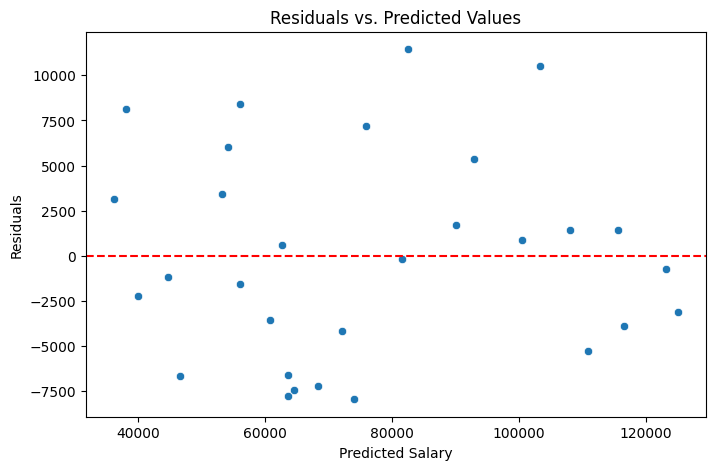

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


In [13]:
X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()
influence = ols_model.get_influence()
student_resid = influence.resid_studentized_internal
outliers_idx = np.where(np.abs(student_resid) > 2)[0]

print("\n" + "="*50)
print("OUTLIER DETECTION (|Studentized residual| > 2)")
print("="*50)
if len(outliers_idx) > 0:
    print(f"Outlier indices: {outliers_idx.tolist()}")
    print("Rows:")
    display(df.iloc[outliers_idx])
else:
    print("No outliers detected.")


OUTLIER DETECTION (|Studentized residual| > 2)
Outlier indices: [19]
Rows:


,YearsExperience,Age,Salary
19,6.0,29,93940


 Confidence Intervals for Coefficients

In [14]:

conf_int_95 = ols_model.conf_int(alpha=0.05)
conf_int_95.columns = ['Lower 95%', 'Upper 95%']


conf_int_99 = ols_model.conf_int(alpha=0.01)
conf_int_99.columns = ['Lower 99%', 'Upper 99%']

print("\n95% CONFIDENCE INTERVALS FOR COEFFICIENTS:")
print(conf_int_95)

print("\n99% CONFIDENCE INTERVALS FOR COEFFICIENTS:")
print(conf_int_99)



95% CONFIDENCE INTERVALS FOR COEFFICIENTS:
                    Lower 95%     Upper 95%
const            21136.061314  30448.339084
YearsExperience   8674.118747  10225.805896

99% CONFIDENCE INTERVALS FOR COEFFICIENTS:
                    Lower 99%     Upper 99%
const            19511.156989  32073.243408
YearsExperience   8403.364027  10496.560616


Prediction for New Values (Confidence & Prediction Intervals)

In [15]:
# New data for prediction
new_experience = pd.DataFrame({'YearsExperience': [7.1, 6.2, 3.7, 9.0]})
new_experience_const = sm.add_constant(new_experience)

# Confidence interval (mean prediction)
pred_conf = ols_model.get_prediction(new_experience_const).summary_frame(alpha=0.05)

# Prediction interval (individual prediction)
# Already includes both confidence and prediction intervals
print("\nPREDICTIONS WITH CONFIDENCE INTERVAL (alpha=0.05):")
print(pred_conf[['mean', 'mean_ci_lower', 'mean_ci_upper']])

print("\nPREDICTIONS WITH PREDICTION INTERVAL (alpha=0.05):")
print(pred_conf[['mean', 'obs_ci_lower', 'obs_ci_upper']])



PREDICTIONS WITH CONFIDENCE INTERVAL (alpha=0.05):
            mean  mean_ci_lower  mean_ci_upper
0   92886.932681   90316.403172   95457.462190
1   84381.966592   82110.541807   86653.391376
2   60757.060788   58256.484329   63257.637247
3  110841.861092  107254.755504  114428.966679

PREDICTIONS WITH PREDICTION INTERVAL (alpha=0.05):
            mean  obs_ci_lower   obs_ci_upper
0   92886.932681  80754.664050  105019.201312
1   84381.966592  72309.531430   96454.401753
2   60757.060788  48639.420638   72874.700938
3  110841.861092  98454.300933  123229.421250


C:\Users\Adio\AppData\Local\Temp\ipykernel_8004\3117049672.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


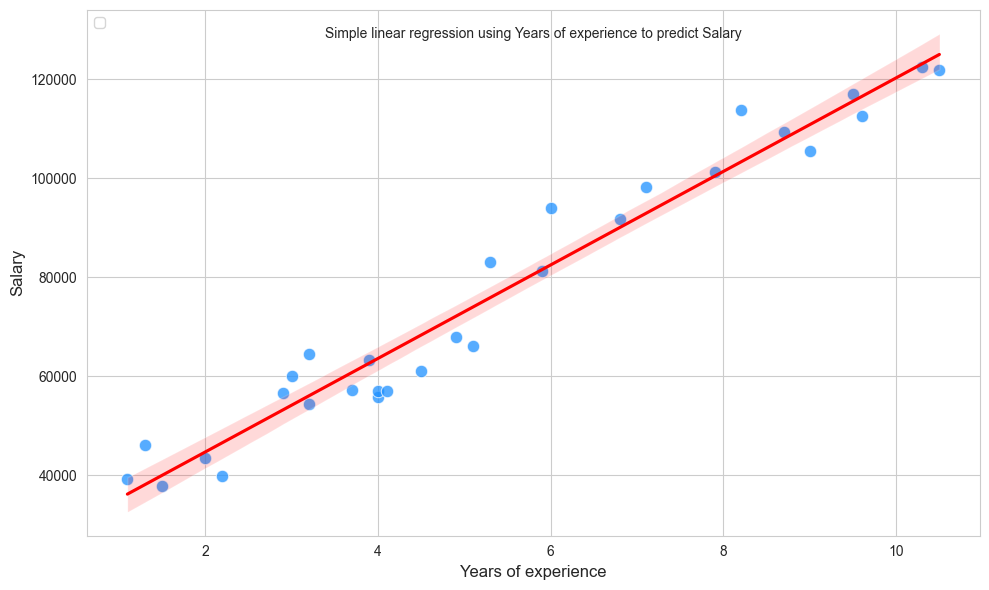

In [16]:
equation_text = f"y = {intercept:.2f} + {slope:.2f}x   R² = {r_squared:.3f}"
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# Scatter
sns.scatterplot(x='YearsExperience', y='Salary', data=df, s=80, alpha=0.75, color='dodgerblue')
# Regression line
ax = sns.regplot(x='YearsExperience', y='Salary', data=df, scatter=False, ci=95, color='red', line_kws={"label": equation_text})
# Ensure legend shows the equation
ax.legend(loc='upper left')

plt.title("Simple linear regression using Years of experience to predict Salary", fontsize=10, y=0.93)
plt.xlabel("Years of experience", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.tight_layout()
plt.show()
